In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
The data used in this notebook is available at this link [https://data.nber.org/nvss/natality/csv/2018/natality2018us.csv](https://data.nber.org/nvss/natality/csv/2018/natality2018us.csv)


In [ ]:
babies = pd.read_csv("../00-donnees/natl2018us.csv")

In [87]:

#Séléctionner uniquement les variables qui nous interressent    
babies = babies[['mager',
        'tbo_rec',
        'previs',
        'wic',
        "rf_pdiab",
        'dplural',
        'sex',
        'dbwt',
        "rf_gdiab",
        'bfacil3',
        "mrace6",
        "frace6",
        'cig_rec','cig_0',
        'bmi_r','bmi',
        'rf_fedrg',
        'meduc',
        'fagecomb',
        'feduc',
        'apgar5',
        'rf_phype',
        'rf_ghype',
        "combgest",
        "gestrec3",
        "ca_downs",
        "ca_limb"
        ]]


In [88]:
## Renommer les variables pour mieux les distinguer
babies = babies.rename(columns={
    "mager":"age_mere",
    "fagecomb":"age_pere",
    "tbo_rec": "ordre_naissance",
    "cig_0":"nbre_cigarette_daily",
    "cig_rec":"mere_fumeuse",
    "bmi_r":"imc_rec",
    "bmi":"imc",
    "bfacil3":"born_hopital",
    "meduc":"niv_educ_mere",
    "feduc":"niv_educ_pere",
    "dbwt":"poids_bebe",
    "mrace6":"mere_race",
    "frace6":"pere_race",
    "combgest":"duree_grossesse",
    "gestrec3":"naissance_premature",
    "rf_fedrg":"medoc_fertilite"
    })



#Traitement rapide des données (recodage, valeurs manquantes )

In [89]:
#On supprime toutes les observations qui sont des valeurs manquantes pour notre variable d'intérêt qu'est le poids des bébés
#indiquer que 9999 correspond aux valeurs manquantes
babies.poids_bebe.replace(9999,np.NaN, inplace=True)
babies.poids_bebe.dropna(inplace=True)

In [90]:

#On recode certaines variables pour la partie analyse
#le sexe
babies.sex.replace({"M":1,"F":0},inplace=True)
#la naissance premature ou pas
babies.naissance_premature.replace(3,np.NaN,inplace=True)
#Mere fumeuse 
babies.mere_fumeuse.replace({"Y":1,"N":0,"U":np.NaN},inplace=True)
#Obtention des alimentations du programme wic
babies.wic.replace({"Y":1,"N":0,"U":np.NaN},inplace=True)
#Niveau d'éducation des mères
babies.niv_educ_mere.replace(9,np.NaN,inplace=True)
#Utilisation des médicaments de fertilité par la mère
babies.medoc_fertilite.replace("U",np.NaN,inplace=True)


# Analyse descriptive unilatérale sur quelque variables

# Manipulation de données


## Création de variables à partir d'autres
Le poids normal à la naissance est entre 2500g et 4000g exclu, donc nous pouvons catégoriser le poids des enfants comme suit:
- $\lt$2500 g : faible poids
- 2500g-4000g : poids normal
-  $\ge$ 4000 g

In [91]:
#Créons la nouvelle variable en se basant sur la catégorisation proposée plus haut
babies.loc[babies.poids_bebe<2500,"poids_cat"] = "Faible"
babies.loc[(babies.poids_bebe >=2500) & (babies.poids_bebe < 4000),"poids_cat"] = "Normal"
babies.loc[babies.poids_bebe>4000,"poids_cat"] = "Surpoids"

#Un tableau de fréquence
babies.poids_cat.value_counts(normalize=True)

Normal      0.840316
Faible      0.082878
Surpoids    0.076806
Name: poids_cat, dtype: float64

84% des enfants ont un poids normal à la naissance et 8% ont des poids faibles, de même que 8% sont en surpoids


In [92]:
"""
Création de la variable diabete pour savoir si la mère 
d'un bébé donné a le diabete ou non, peut importe le moment où il est déclenché, 
avant ou après la grossesse
"""
babies.loc[(babies['rf_pdiab']=="Y")|(babies['rf_gdiab']=="Y"),"diabete"]=1
babies.loc[(babies['rf_pdiab']=="N") & (babies['rf_gdiab']=="N"),"diabete"]=0
babies[["rf_gdiab","rf_pdiab","diabete"]].head()

,rf_gdiab,rf_pdiab,diabete
0,N,N,0.0
1,N,N,0.0
2,N,N,0.0
3,N,N,0.0
4,N,N,0.0


In [93]:
"""
Création de la variable hypertension 
indiquant si la mère d'un bébé donné souffre de l'hypertension ou non 
que ce soit avant la grossesse ou après la grossesse.
"""
babies.loc[(babies['rf_phype']=="Y")|(babies['rf_ghype']=="Y"),"hypertension"]=1
babies.loc[(babies['rf_phype']=="N") & (babies['rf_ghype']=="N"),"hypertension"]=0
babies[["rf_phype","rf_ghype","hypertension"]].tail()

,rf_phype,rf_ghype,hypertension
2425264,N,N,0.0
2425265,N,N,0.0
2425266,N,N,0.0
2425267,N,N,0.0
2425268,N,Y,1.0


In [94]:
#Convertissons le poids des enfants en kilogrammes 
babies["poids_bebe"] /=1000

## Opérations de filtrage


In [95]:
#5 1er enfants de sexe masculin dans l'ordre d'apparition dans la base
babies[babies["sex"]==1].head(5)

,age_mere,ordre_naissance,previs,wic,rf_pdiab,dplural,sex,poids_bebe,rf_gdiab,born_hopital,mere_race,pere_race,mere_fumeuse,nbre_cigarette_daily,imc_rec,imc,medoc_fertilite,niv_educ_mere,age_pere,niv_educ_pere,apgar5,rf_phype,rf_ghype,duree_grossesse,naissance_premature,ca_downs,ca_limb,poids_cat,diabete,hypertension
0,30,4,8,0.0,N,1.0,1.0,3.657,N,1,10,1,0.0,0,4,30.7,X,6.0,31,3,9.0,N,N,38.0,2.0,N,N,Normal,0.0,0.0
2,28,2,17,1.0,N,1.0,1.0,3.470,N,1,10,1,0.0,0,4,30.0,X,6.0,31,4,9.0,Y,N,37.0,2.0,N,N,Normal,0.0,1.0
4,37,6,15,1.0,N,1.0,1.0,2.125,N,1,10,2,0.0,0,5,35.5,X,4.0,35,3,9.0,N,N,37.0,2.0,N,N,Faible,0.0,0.0
10,25,4,9,0.0,N,1.0,1.0,4.130,N,1,10,1,0.0,0,3,25.7,X,4.0,26,4,8.0,N,N,39.0,2.0,N,N,Surpoids,0.0,0.0
11,27,1,9,0.0,N,1.0,1.0,2.755,N,1,10,1,0.0,0,2,24.3,Y,6.0,26,6,8.0,N,N,40.0,2.0,N,N,Normal,0.0,0.0


In [96]:
#5 1er enfants de sexe féminin, jumeaux et d'une mère obèse de niveau I
babies[
       (babies["sex"]==0) & 
       (babies["dplural"]==2) & 
       (babies["imc_rec"] ==6)
       ].head(5)

,age_mere,ordre_naissance,previs,wic,rf_pdiab,dplural,sex,poids_bebe,rf_gdiab,born_hopital,mere_race,pere_race,mere_fumeuse,nbre_cigarette_daily,imc_rec,imc,medoc_fertilite,niv_educ_mere,age_pere,niv_educ_pere,apgar5,rf_phype,rf_ghype,duree_grossesse,naissance_premature,ca_downs,ca_limb,poids_cat,diabete,hypertension
659,26,5,8,1.0,N,2.0,0.0,0.945,N,1,30,3,NaN,4,6,46.0,X,3.0,25,3,4.0,N,N,25.0,1.0,N,N,Faible,0.0,0.0
898,30,1,99,0.0,N,2.0,0.0,1.920,N,1,10,1,0.0,0,6,42.1,Y,4.0,33,4,8.0,N,N,33.0,1.0,N,N,Faible,0.0,0.0
899,30,2,99,0.0,N,2.0,0.0,1.940,N,1,10,1,0.0,0,6,42.1,Y,4.0,33,4,8.0,N,N,33.0,1.0,N,N,Faible,0.0,0.0
3280,23,4,13,0.0,N,2.0,0.0,2.888,Y,1,10,1,0.0,0,6,56.1,X,5.0,24,4,8.0,N,N,37.0,2.0,N,N,Normal,1.0,0.0
4531,28,4,14,1.0,N,2.0,0.0,2.415,N,1,20,2,0.0,0,6,57.7,X,2.0,27,2,5.0,N,N,36.0,1.0,N,N,Faible,0.0,0.0


# Jointure de tables

In [97]:
#Considérons la table des bébées issues de mères mineures, pour simplifier nous ne prenons pas toutes les variables
babies_meres_mineures= babies[babies["age_mere"]<18][["imc","sex","poids_bebe","age_mere"]]

#Considérons la table des bébés qui sont nés à l'hopital 
babies_born_hospital = babies[babies["born_hopital"]==1][["imc","sex","poids_bebe","born_hopital"]]

#Jointure strict entre l'index des individus
babies_jointure1 = babies_meres_mineures.merge(babies_born_hospital,left_index=True,right_index=True)

babies_jointure1.head()

,imc_x,sex_x,poids_bebe_x,age_mere,imc_y,sex_y,poids_bebe_y,born_hopital
262,28.5,1.0,3.510,17,28.5,1.0,3.510,1
461,24.2,1.0,3.365,17,24.2,1.0,3.365,1
637,24.1,1.0,3.370,17,24.1,1.0,3.370,1
680,17.6,1.0,2.715,17,17.6,1.0,2.715,1
1082,26.1,0.0,3.585,17,26.1,0.0,3.585,1


In [98]:
#Jointure à droite entre les tables précédentes
#Tous les bébés mères mineures sont pris en compte, qu'ils aient une correspondance dans l'autre table ou pas
babies_jointure2 =  babies_meres_mineures.merge(babies_born_hospital,how="left",left_index=True,right_index=True)
babies_jointure2.head()

,imc_x,sex_x,poids_bebe_x,age_mere,imc_y,sex_y,poids_bebe_y,born_hopital
262,28.5,1.0,3.510,17,28.5,1.0,3.510,1.0
461,24.2,1.0,3.365,17,24.2,1.0,3.365,1.0
637,24.1,1.0,3.370,17,24.1,1.0,3.370,1.0
680,17.6,1.0,2.715,17,17.6,1.0,2.715,1.0
1082,26.1,0.0,3.585,17,26.1,0.0,3.585,1.0


## Agrégation 
poids moyen,écart type,poids minimum et poids maximal par sexe

In [99]:
babies.groupby("sex").agg({"poids_bebe":['mean','std','min','max']})

poids_bebe                        
          mean       std    min    max
sex                                   
0.0   3.203972  0.573976  0.227  8.165
1.0   3.317689  0.601514  0.227  8.165

Le poids moyen des bébés de sexe masculin est de 3,3 Kg, de même que les bébés de sexe féminin soit 3.2 Kg comme poids moyen, Le bébés de sexe masculin sont ont en moyenne des poids plus élevés que ceux de sexe féminin
Quelque soit le sexe, le poids le plus petit est 0,2 kg et le plus élevé est 8,2 Kg

# Statistique descriptive de quelques variables




In [100]:
#Indiquez à python les valeurs manquante avant de faire les statistiques
babies.imc.replace(99.9,np.NaN,inplace=True)
babies.age_pere.replace(99,np.NaN,inplace=True)
babies.duree_grossesse.replace(99,np.NaN,inplace=True)


#Statitistique descriptive de quelques variables
babies[["poids_bebe","imc","age_mere","age_pere","duree_grossesse"]].describe()

,poids_bebe,imc,age_mere,age_pere,duree_grossesse
count,2.423751e+06,2.366215e+06,2.425269e+06,2.161588e+06,2.423758e+06
mean,3.262086e+00,2.720634e+01,2.912653e+01,3.191717e+01,3.858586e+01
std,5.909505e-01,6.747719e+00,5.808076e+00,6.824224e+00,2.476832e+00
min,2.270000e-01,1.300000e+01,1.200000e+01,1.100000e+01,1.700000e+01
25%,2.960000e+00,2.230000e+01,2.500000e+01,2.700000e+01,3.800000e+01
50%,3.300000e+00,2.570000e+01,2.900000e+01,3.200000e+01,3.900000e+01
75%,3.629000e+00,3.070000e+01,3.300000e+01,3.600000e+01,4.000000e+01
max,8.165000e+00,6.990000e+01,5.000000e+01,9.500000e+01,4.700000e+01


En écartant les valeurs manquantes pour les variables ci-dessous on obtient l'interpretation suivante:
- En moyenne les nouveaux nées pèse environ **3.3** kg, 50% ont un poids inférieur à *3.3* kg et 50% en ont plus, le plus grand poids est 8,16 Kg et celui ayant le plus faible poids pèse 0.22 kg, la médiane et la moyenne sont très proche (3,26 et 3,3), nous pouvons dire que le poids des bébés est une distribution symétrique, *un histogramme de celui ci nous le confirmera plus bas*.
Par ailleurs l'écart type du poids des bébés est relativement faible soit 0,6, Donc les enfants ont en moyenne des poids relativement proche de la moyenne (3,26)

- Les bébés sont en moyenne nées après 38 semaines, il ne sont donc pas en moyenne prématuré, la plus petite durée de grossesse est de 17 semaines, et la plus grande est de 47 semaines, l'écart type de la durée des grossesses est de 2 semaines et démi environ. 

- En moyenne l'indice de masse corporelle (imc) des mères est de 27,2, elles sont donc en moyenne en surpoids, 50% ont un imc plus bas que 25,7 et 50% en ont plus, l'imc le plus élevé est 69,9 et le plus faible est 13

- l'age moyen des pères est 31 ans, le plus agé a 95 ans et le plus jeune a 11 ans


#Fonction à appliquer au sous-groupe des races des mères

In [101]:
def stats_by_group(data,sous_groupe):
  """
  Renvoie un dictionnaire de donné donnant des statistiques par origine des mères sur les caractères suivants
  l'age moyen des mères 
  l'écart type des poids des nouveaux nées
  l'imc le plus élevé des mères
  """
  #Filtrer selon la modalité fournie
  filtre =  data[data["mere_race"]==sous_groupe]

  results={"groupe": sous_groupe}

  #Age moyen des mères
  results["age_moyen_mere"] = np.floor(filtre["age_mere"].mean()) #l'age moyen arrondis
  #Poids moyen des enfants
  results["poids_moyen_enfant"]= filtre["poids_bebe"].mean()
  #Dispersion du poids des nouveaux nées par rapport à la moyenne
  results["ecart_type_poids"] = filtre["poids_bebe"].std()
  return results;

# Application de la fonction dans une boucle sur le sous-groupe des mères

In [102]:
#Sortie les statistiques par origine des mères
list_stats = []
for modalite in babies.mere_race.value_counts().index:
  list_stats.append(stats_by_group(babies,modalite))
#Affichons la liste des résultats
print(*list_stats,sep='\n')

{'groupe': 10, 'age_moyen_mere': 29.0, 'poids_moyen_enfant': 3.313907631132195, 'ecart_type_poids': 0.5731244156734261}
{'groupe': 20, 'age_moyen_mere': 27.0, 'poids_moyen_enfant': 3.0732037151612075, 'ecart_type_poids': 0.6418678904357176}
{'groupe': 40, 'age_moyen_mere': 32.0, 'poids_moyen_enfant': 3.169223599681916, 'ecart_type_poids': 0.5364868704845852}
{'groupe': 61, 'age_moyen_mere': 27.0, 'poids_moyen_enfant': 3.239011590625067, 'ecart_type_poids': 0.5980283419507243}
{'groupe': 41, 'age_moyen_mere': 30.0, 'poids_moyen_enfant': 3.1779210324559193, 'ecart_type_poids': 0.5503100148485823}
{'groupe': 30, 'age_moyen_mere': 27.0, 'poids_moyen_enfant': 3.2955655042412797, 'ecart_type_poids': 0.6092294392369916}
{'groupe': 51, 'age_moyen_mere': 28.0, 'poids_moyen_enfant': 3.262738390469221, 'ecart_type_poids': 0.6168713770369428}


# Quelques représentations graphiques


## Diagramme en secteur de la pluralité des naissances

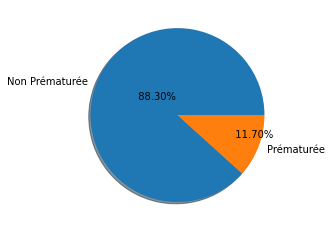

In [103]:
#Recupérer la distribution des fréquences du sexe des enfants
sex_freq=babies.naissance_premature.value_counts()
#Représenter un diagramme ciruculaire du sexe des bébés
plt.pie(sex_freq.values,labels=["Non Prématurée","Prématurée"],autopct="%23.2f%%",shadow=True )
plt.show()

11,70% des nouveaux nées sont des prématurées et 88,3% sont nées dans une durée normale


## Point nuage entre l'indice de masse corporelle des mères et le poids de leurs bébés


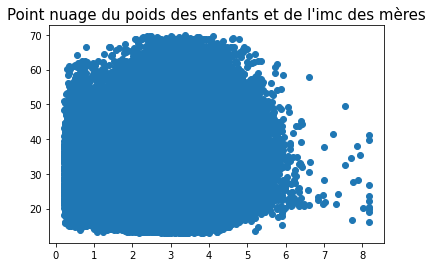

In [104]:
#Vue que les valeurs des bébés prennent de grandes valeurs en décimale
nuages = plt.scatter(babies.poids_bebe,babies.imc) 
nuages.axes.set_title("Point nuage du poids des enfants et de l'imc des mères",fontSize=15)
plt.show()

Du graphique on remarque qu'il n'y a pas une correlation linéaire simple entre le poids du nouveau né et l'indice de masse corporelle (IMC) de la mère, mais il y a une présomption d'une relation non linéaire sous la forme d'un disque.


## Diagramme en barres du niveau d'instruction des mères

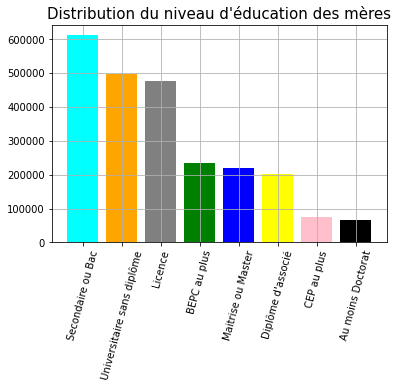

In [105]:
#Récupérer les fréquences relatives du niveau d'études des mères
freq_niv_educ_mere = babies.niv_educ_mere.value_counts()

#Définir quelques couleurs pour la représentation
colors = ["cyan","orange","gray","green","blue","yellow","pink","black"]

#Les valeurs des modalités 
labels_niveau_education = ["Secondaire ou Bac","Universitaire sans diplôme","Licence","BEPC au plus","Maitrise ou Master","Diplôme d'associé","CEP au plus","Au moins Doctorat"]
coordonnees_modalites = np.arange(8) -0.35/2
fig,axes = plt.subplots()

#Un titre pour notre diagramme en barres
axes.set_title("Distribution du niveau d'éducation des mères",fontSize=15)

#Fixer la position des modalités sur l'axe des abcisses
axes.set_xticks(coordonnees_modalites) 

#Définir la description des modalités
axes.set_xticklabels(labels_niveau_education,rotation=75)

#Créer le graphique
plt.bar (coordonnees_modalites,freq_niv_educ_mere.values,color=colors)
plt.grid(True)
plt.show()


La majorité des mères de la population on un niveau scolaire élevés, pour la plutpart elle ont un niveau scolaire atteignant la classe secondaire, comme nous le montre le graphique.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


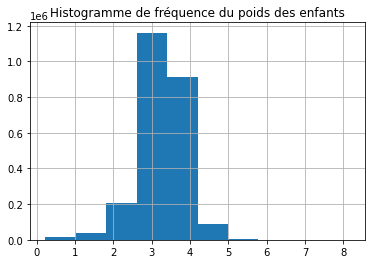

In [106]:
#Histogramme du poids des enfants
hist = plt.hist(babies.poids_bebe)
plt.grid(True)
plt.title("Histogramme de fréquence du poids des enfants")
plt.show()

Comme on le présentait dans l'analyse descriptive on voit bien que la distribution du poids des bébés est plus ou moins symétrique autour de la moyenne, et que la variance autour de cette moyenne est relativement faible.

# Exportations de la base extraites sous format csv


In [45]:
babies.to_csv("babies.csv")

# Exportation des tables pour la partie SQL
Etant donné que nous n'avons pas accès aux identifiants des individus, nous avons utilisé les numéros de ligne comme identifiant

## Exportation de la table des zones

In [107]:
#Nous supprimons les valeurs manquantes avant l'exportation des tables vers SQL
babies.dropna(inplace=True)


#Récupération des indexs qui vont servir d'identifiant
index_race_mere = pd.Series(babies["mere_race"].value_counts(sort=False).index)
index_race_pere = babies["pere_race"].value_counts(sort=False).index

#Concaténer les indexs avec la description correspondantes
mere_race = pd.concat([index_race_mere,pd.Series([
"Blanc (uniquement)",
"Noir (uniquement)",
"AIAN (uniquement)",
"Asiatique (uniquement)",
"NHOPI (uniquement)",
"Plus d'une origine",
"Inconnu"
])],axis=1)

pere_race = pd.concat([index_race_mere,pd.Series([
"Blanc (uniquement)",
"Noir (uniquement)",
"AIAN (uniquement)",
"Asiatique (uniquement)",
"NHOPI (uniquement)",
"Plus d'une origine",
"Inconnu"
])],axis=1)

#Concaténer les lignes
zone = mere_race.append(pere_race).rename({0:"code_zone", 1: "label"},axis=1)

#Exportation
zone.to_csv("../01-SQL/zone.csv")


## Exportation des bébés


In [108]:
bebe = babies[[
"ordre_naissance",
"previs",
"wic",
"medoc_fertilite",
"born_hopital",
"poids_bebe",
"dplural",
"duree_grossesse",
"sex",
"pere_race",
"mere_race"]]
bebe["id_mere"] = bebe["id_pere"] = bebe.index
bebe.index.rename("id_bebe",inplace=True)
bebe.to_csv("../01-SQL/bebe.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## Base des mères 

In [112]:
meres = babies[[
"age_mere",
"nbre_cigarette_daily",
"imc",
"niv_educ_mere",
"mere_fumeuse",  
"mere_race"       
]]
meres.rename(columns={"mere_race":"code_zone"},inplace=True)
meres.index.rename("id_mere",inplace=True)
meres.to_csv("../01-SQL/mere.csv")

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Base des pères

In [110]:
peres = babies[[
"niv_educ_pere",
"age_pere",             
]]
peres.index.rename("id_pere",inplace=True)
peres.to_csv("../01-SQL/pere.csv")

#Regression linéaire
Dans cette section nous allons expliquer le poids des bébés en fonction de certains facteurs.

En se basant sur la revue de littérature, les facteurs qui expliquent le poids des bébés et qui sont disponibles pour notre étude sont les suivants: 
- le sexe
- l'age de la mère
- la durée de la grossesse
- pluralité
- les consultations prénatales
- La consomation du tabac
- que la mère soit ou non attiente de diabete
- que la mère soit ou non atteinte d'hypertension
- alimentation du programme wic

In [111]:
import statsmodels.api as sm 


#Extraire les variables
X = babies[[
            "sex",
            "age_mere",
            "duree_grossesse",
            "dplural",
            "previs",
            "mere_fumeuse",
            "diabete",
            "hypertension",
            "wic"    
]]

#Extraire le poids des bébés
Y =  babies.poids_bebe

#Ajouter le terme constant 
X = sm.add_constant(X)

# #Définir le modèle en excluant les observations présantant des valeurs manquantes
regression = sm.OLS(Y,X).fit()

#Afficher les résultats
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:             poids_bebe   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                 1.208e+05
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:14:09   Log-Likelihood:            -1.3542e+06
No. Observations:             2053513   AIC:                         2.708e+06
Df Residuals:                 2053503   BIC:                         2.708e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0919      0.007   -1

# Commentaire sur le modèle de regression

Ce modèle explique la variabilté du poids des enfants dans une proportion de 34%.

Toutefois elle est globalement significatif au seuil de 1%, (la probabilité de F est quasiment nule)
De ce modèle on déduit que tous les facteurs considérés chez la mère influence le poids du nouveau nés(car toutes les variables sont significative) à un seuile de 1%.

Notamment: L'age de la mère, la durée de la grossesse , les visites prénatales, le diabete sont des facteurs qui influence positivement le poids des enfants, tandis que l'hypertension, la pluralité de la grossesse, la consommation du tabac et l'hypertension, sont des facteurs qui influencent négativement le poids des enfants à la naissance.

Par ailleurs le fait q'un bébé soit garçon augmente sa chance d'avoir un poids élevé relativement à une fille.

Cependant, le signe de la variable wic n'est pas celui attendu, car le wic est un programme de suivi des femmes enceintes qui est destiné à leur permettre de garder leur état de santé et celui de leur enfants, il devrait donc améliorer le poids des nouveaux nés et non le réduire. Mais pour approfondir l'impact réel du wic, on pourrait catégoriser les bébés selon leurs poids.

In [ ]:
ddf= pd.read_csv("https://data.nber.org/nvss/natality/csv/2018/natality2018us.csv")